/tmp/ipython-input-2445869299.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driver Ratings'].fillna(df['Driver Ratings'].mean(), inplace=True)
/tmp/ipython-input-2445869299.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

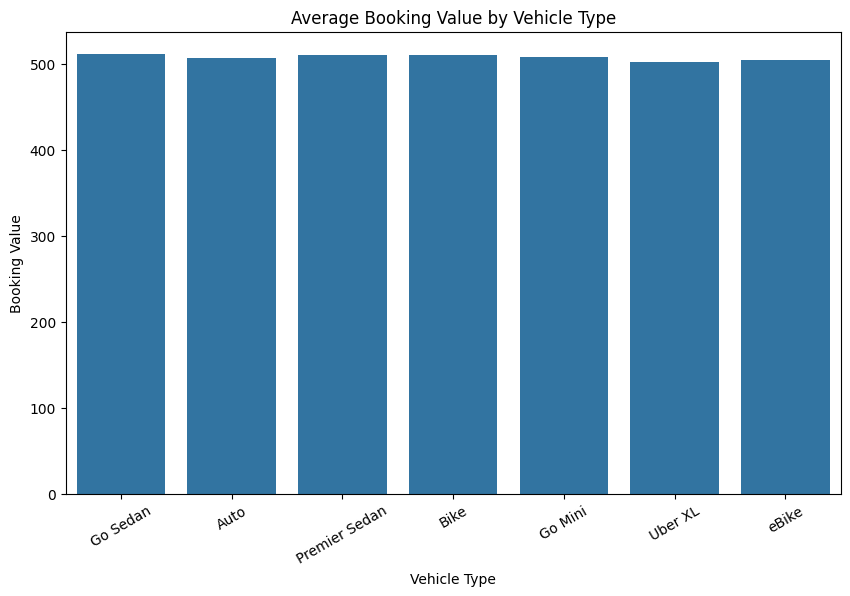

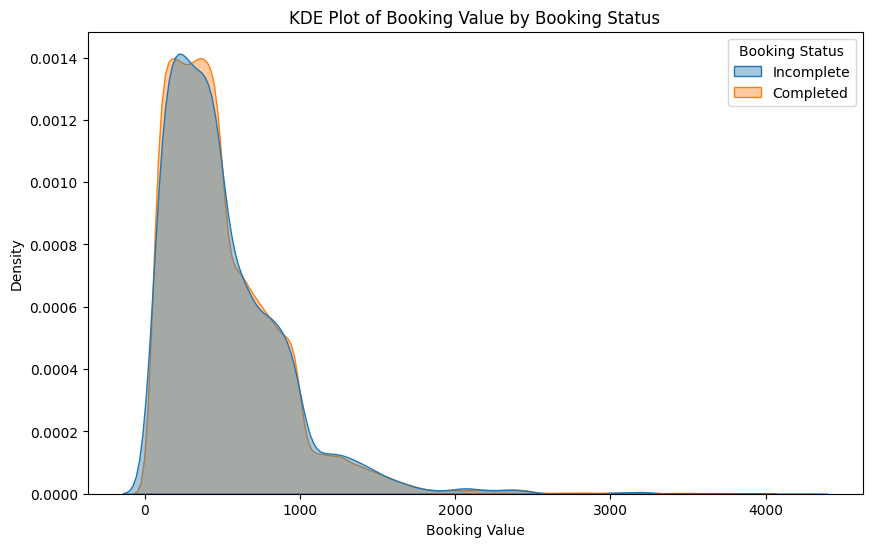

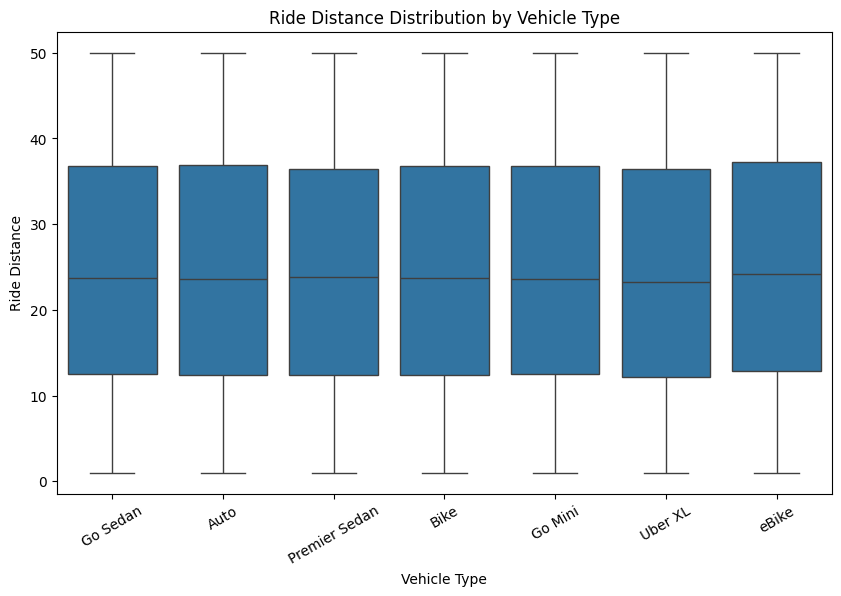

<Figure size 1000x800 with 0 Axes>

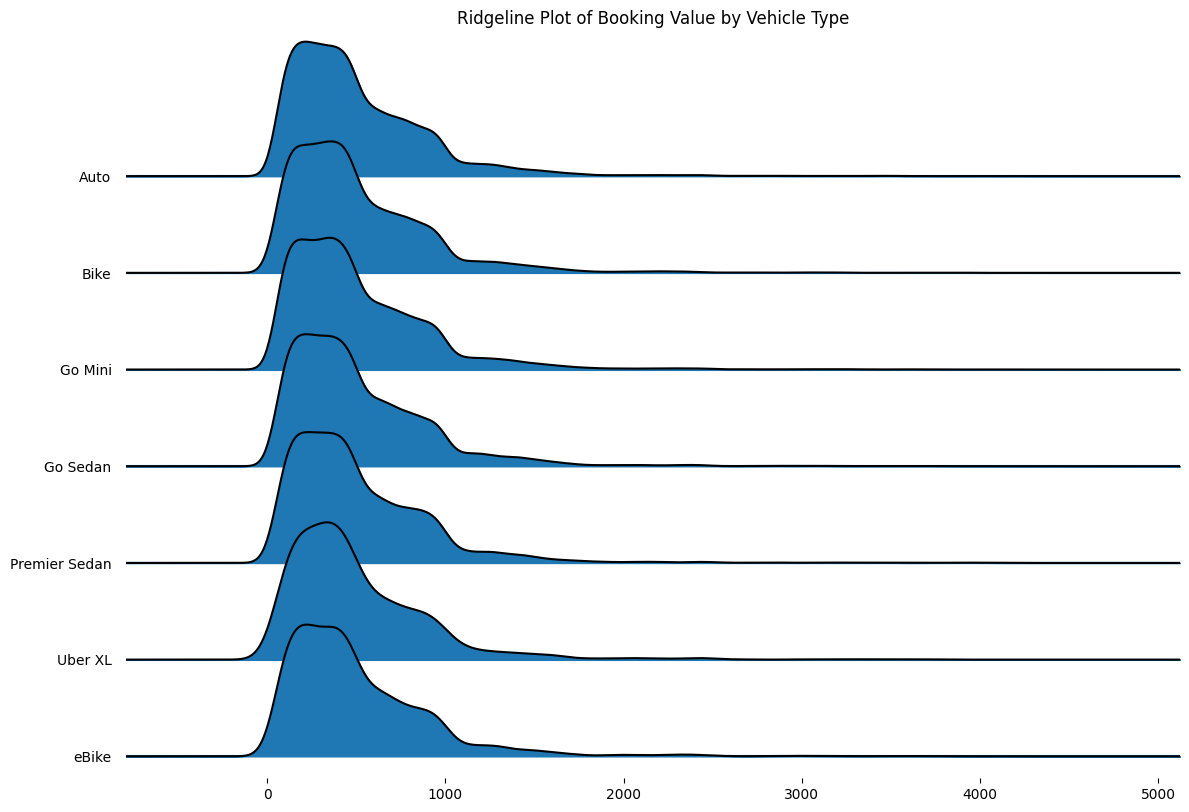

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


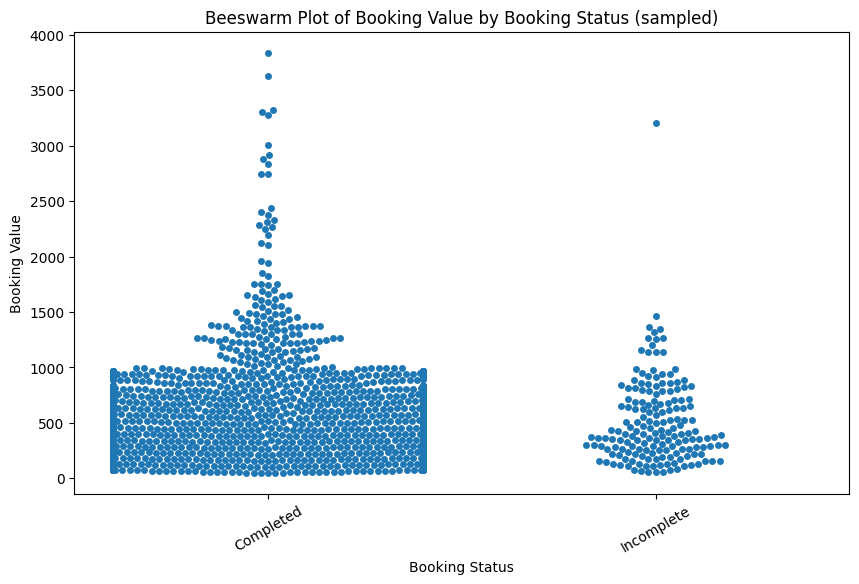

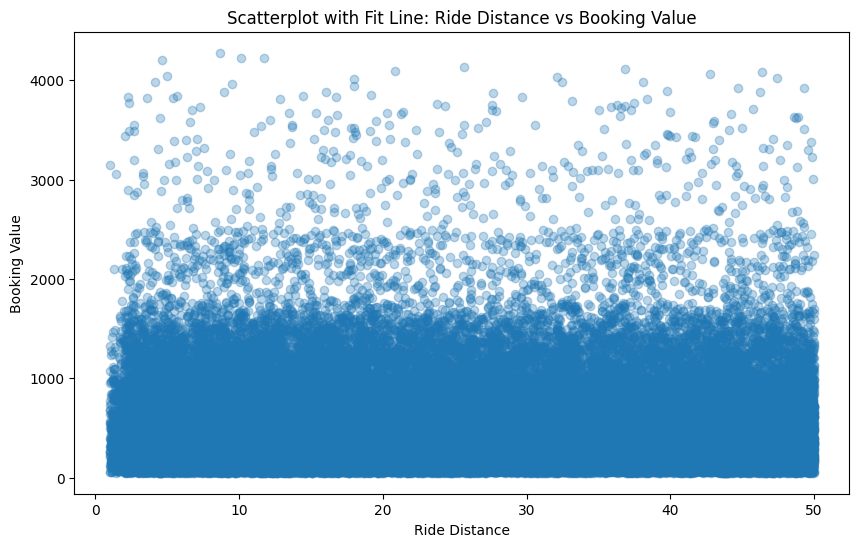

In [ ]:
# Step 1: Import required libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For Ridgeline & Beeswarm
import joypy
import numpy as np

# Load dataset1
df = pd.read_csv("/content/ncr_ride_bookings.csv")

# Step 2: Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing values in key numeric columns
df.dropna(subset=['Booking Value', 'Ride Distance'], inplace=True)
df['Driver Ratings'].fillna(df['Driver Ratings'].mean(), inplace=True)
df['Customer Rating'].fillna(df['Customer Rating'].mean(), inplace=True)

# -----------------------------
# Step 3: Categorical vs Continuous
# -----------------------------

# Example categorical variable = Vehicle Type
# Example continuous variable = Booking Value

# 1. Bar Chart – Average Booking Value by Vehicle Type
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Vehicle Type', y='Booking Value', estimator=np.mean, errorbar=None)
plt.title("Average Booking Value by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

# 2. Grouped Kernel Density Plot – Booking Value by Booking Status
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Booking Value', hue='Booking Status', fill=True, common_norm=False, alpha=0.4)
plt.title("KDE Plot of Booking Value by Booking Status")
plt.show()

# 3. Box Plot – Ride Distance by Vehicle Type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Vehicle Type', y='Ride Distance')
plt.title("Ride Distance Distribution by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

# 4. Violin Plot – Revenue by Vehicle Type
# plt.figure(figsize=(10,6))
# sns.violinplot(data=df, x='Vehicle Type', y='Revenue')
# plt.title("Revenue Distribution by Vehicle Type")
# plt.xticks(rotation=30)
# plt.show()

# 5. Ridgeline Plot – Booking Value by Vehicle Type
plt.figure(figsize=(10,8))
joypy.joyplot(df, by='Vehicle Type', column='Booking Value', figsize=(12,8))
plt.title("Ridgeline Plot of Booking Value by Vehicle Type")
plt.show()

# 6. Beeswarm Plot – Booking Value by Booking Status
plt.figure(figsize=(10,6))
sns.swarmplot(data=df.sample(2000, random_state=42), x='Booking Status', y='Booking Value')
plt.title("Beeswarm Plot of Booking Value by Booking Status (sampled)")
plt.xticks(rotation=30)
plt.show()

# -----------------------------
# Step 4: Continuous vs Continuous
# -----------------------------

# Scatterplot with Fit Line – Ride Distance vs Booking Value
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Ride Distance', y='Booking Value', scatter_kws={'alpha':0.3})
plt.show()

In [ ]:
!pip install joypy

In [ ]:
df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,102000,102000.000000,102000.000000,0.0,0.0,9000.0,102000.000000,102000.000000,102000.000000,102000.000000
mean,2024-06-30 17:23:45.600000,8.291455,29.149636,NaN,NaN,1.0,508.295912,24.637012,4.230992,4.404584
min,2024-01-01 00:00:00,2.000000,10.000000,NaN,NaN,1.0,50.000000,1.000000,3.000000,3.000000
25%,2024-04-01 00:00:00,5.100000,21.600000,NaN,NaN,1.0,234.000000,12.460000,4.100000,4.200000
50%,2024-06-30 00:00:00,8.200000,28.800000,NaN,NaN,1.0,414.000000,23.720000,4.230992,4.404584
75%,2024-09-30 00:00:00,11.400000,36.800000,NaN,NaN,1.0,689.000000,36.820000,4.500000,4.700000
max,2024-12-30 00:00:00,15.000000,45.000000,NaN,NaN,1.0,4277.000000,50.000000,5.000000,5.000000
std,NaN,3.712160,8.902577,NaN,NaN,0.0,395.805774,14.002138,0.417153,0.418057
